# Import Python Modules

This project can be used on google Colab or an offline IDE that supports Juypter.
Check if using google Colab or vs code interpreter. If colab, py files must be imported to the colab before using import ...

In [3]:
# Import Modules

# Get path of current interpreter
import sys
interpPath = sys.executable
print("Current interpreter = " + interpPath)

# Check Path is Colab interpreter
if(interpPath == "/usr/bin/python3"):
  # Mount google drive
  from google.colab import drive
  drive.mount('/content/gdrive')

  # Import .py files from
  !cp /content/gdrive/MyDrive/University/Year\ 2/AIGP/Programs/AI-Game-Programming/Colab\ Notebooks/ActivationFunctions.py .
  !cp /content/gdrive/MyDrive/University/Year\ 2/AIGP/Programs/AI-Game-Programming/Colab\ Notebooks/ArtifcialNeuralNetwork.py .

# Third Party Imports
import numpy as np
import matplotlib.pyplot as plt

# First Party Imports
import ActivationFunctions as act
import ArtifcialNeuralNetwork as ann

Current interpreter = c:\ProgramData\anaconda3\python.exe


# Research

## Feed forward Artificial Neural Network



### Weights
Adjust weights of neurons to provide desired outputs for all cases.

This is called supervised learning. We train neuronsusing examples. The learning algorithm maps an input to an output based on example input-output pairs.

In my code, input-output pairs are defined by X and desired outputs Y


### Activation Functions

![image.png](attachment:image.png)

### Inputs and Outputs

# AI Game Programming Labs

## Lab Week 4
Training a perceptron to learn a simple task using the error

### Code Snippets

In [ ]:
# Activation Functions

# Sign Function
def Sign(X, THRESHOLD):
    if X >= THRESHOLD: return 1
    else: return -1

# Step function
def Step(X, THRESHOLD):
    if X >= THRESHOLD: return 1
    else: return 0

# Sigmoid function
def Sigmoid(X, THRESHOLD):
   return (1 / (1 + np.exp(-(X- THRESHOLD))))

def Linear(X, THRESHOLD):
    return X - THRESHOLD

In [ ]:
# Weight Training Functions
# Input Function
def Input(X1,W1, X2,W2):
    return ((X1*W1) + (X2*W2))

# Error Function
def Error(YD, Y):
    return YD - Y

# Input Function
def Learn(W, LEARN_RATE, X, E):
    return (W + (LEARN_RATE * X * E))

In [ ]:
# Supervised Learning Algorithm
# Threshold for activation functions
THRESHOLD = 0.2

# Learning rate for weight and error calculation
LEARN_RATE = 0.1

# Inputs and Desired Outputs
X1 = [0.0, 0.0, 1.0, 1.0]
X2 = [0.0, 1.0, 0.0, 1.0]
YD = [0.0, 0.0, 0.0, 1.0]

INPUT_COUNT_MAX = len(X1)
# NUM_INPUTS = 2

# Epoch Passes (Starts at epoch 1)
epochCount = 1
EPOCH_COUNT_MAX = 1000

# Initial input weights
w = [0.3, -0.2]
NUM_WEIGHTS = len(w)

# Feed Forward Propogation Algorithm
while(epochCount < EPOCH_COUNT_MAX):
    for i in range(0,INPUT_COUNT_MAX,1):
        # Produce input from random weights
        X = ann.Input(X1[i], w[0], X2[i], w[1])

        # Produce output from input using activation funcntion
        Y = act.Step(X, THRESHOLD)

        # Calculate error ( error = yD - Y)
        ERROR = ann.Error(YD[i], Y)

        # Adjust weights based on error
        w[0] = ann.Learn(w[0], LEARN_RATE, X1[i], ERROR)
        w[1] = ann.Learn(w[1], LEARN_RATE, X2[i], ERROR)
    epochCount += 1

# Print Results
print("Epoch Units = " + str(epochCount))
print("Learning rate = " + str(LEARN_RATE))

for i in range(0, NUM_WEIGHTS,1): print("w" + str(i) + " = " + str(w[i]))

### Task 2.1: Range of the number of epoch

Find the minimum number of epochs. Is 5 (in the example code) the minimum number of epoch
for this training?

Epoch Results

Epoch Units = 2
w0 = 0.3
w1 = -0.1

Epoch Units = 3
w0 = 0.3
w1 = 0.0

Epoch Units = 4
w0 = 0.3
w1 = 0.1

Epoch Units = 5
w0 = 0.19999999999999998
w1 = 0.1

Epoch Units = 1000
w0 = 0.19999999999999998
w1 = 0.1

Epoch Evaluation

Once Reaching a suitagbly accurate output, increasing the number of epochs to be run becomes negligble. In this case there was no difference between 5 epochs and 1000 epochs

### Task 2.2: Range of learning rate α

From the previous task, the learning rate α was set to 0.1. Systematically conduct an experiment
to find out the ‘range’ of α that works for this case
![image.png](attachment:image.png)

Learning rate Results (0.05-0.15) Yielded slightly better results

Learning rate = 0.05
Epoch Units = 1000
w0 = 0.15000000000000002
w1 = 0.04999999999999999

Learning rate = 0.06
Epoch Units = 1000
w0 = 0.18
w1 = 0.03999999999999998

Learning rate = 0.07
Epoch Units = 1000
w0 = 0.15999999999999998
w1 = 0.08000000000000002

Learning rate = 0.08
Epoch Units = 1000
w0 = 0.13999999999999996
w1 = 0.12

Learning rate = 0.09
Epoch Units = 1000
w0 = 0.12
w1 = 0.15999999999999998

Learning rate = 0.10
Epoch Units = 1000
w0 = 0.19999999999999998
w1 = 0.1

Learning rate = 0.11
Epoch Units = 1000
w0 = 0.19
w1 = 0.01999999999999999

Learning rate = 0.13
Epoch Units = 1000
w0 = 0.16999999999999998
w1 = 0.06

Learning rate = 0.14
Epoch Units = 1000
w0 = 0.15999999999999998
w1 = 0.08000000000000002

Learning rate = 0.15
Epoch Units = 1000
w0 = 0.15
w1 = 0.09999999999999998

Learning Rate Evaluation

My results showed that even a +0.1 change from the correct learning rate produced higly inaccurate weights. To reduce the inaccuracy, I tried to increase the number of epochs, hoping that this would give the algorithm a better chance of finding the correct weights. Looking back this made no difference. As shown in my epoch testing, a correct output was achieved by 4 epochs, increasing the maximum number of epochs was completely negligble past this factor.

I would suggest using a maximum range of +- 0.005 from the correct learning rate, to results close to the desired output.

### Task 2.3: Activation functions and thresholds

So far, we have used only the Step function with threshold θ = 0.2. What about other activation functions and thresholds?

 a) Step function
Systematically conduct an experiment to find out the range of theta θ that works or does not
work, in this case. Note that you need to also consider learning rate α.


b) Sign function
Systematically conduct an experiment to find out the range of theta θ that works or does not
work, in this case. Note that you need to also consider learning rate α.


c) Sigmoid function
Systematically conduct an experiment to find out the range of theta θ that works or does not
work, in this case. Note that you need to also consider learning rate α.



d) Linear function
Systematically conduct an experiment to find out the range of theta θ that works, or does not
work, in this case. Note that you need to also consider learning rate α.

### Task 3: Different inputs/outputs table (dataset) for training

Train your neuron with a different decision-making table for your NPC:

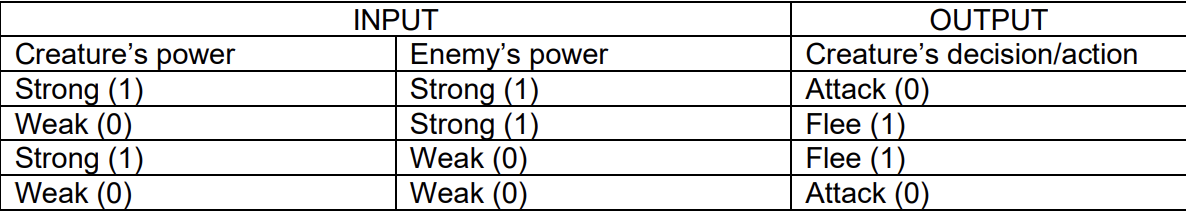


## Lab Week 5
Simple multi-layer ANN and backpropagation

Error and error gradient
In this lab, Sigmoid function will be used as the activation function and 'error gradient
𝛿' will be used instead of 'error 𝑒′ (difference between the current output and the correct
output)

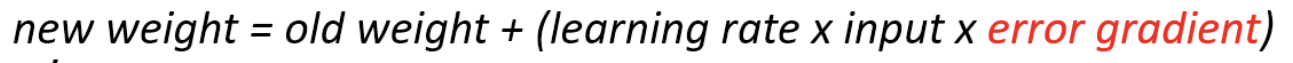

Derivitive of Sigmoid Function

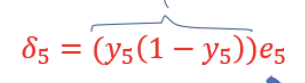

### TASK
Write Python code using Google Colab to implement the simple multilayer neural
network above and the backpropagation training to make the network learn to handle a
non-player character’s decision making process in your game - that is, whether the
creature will attack of flee, depending on the creature’s power and enemy’s power.

You may notice that the number of inputs and outputs in this example are still the same
as those in our single-neuron case. This is because it's easier to manage and study.

If this works, then you can easier the same method to more inputs, outputs and neurons.
(Note that for this type of decision, one neuron is not enough. If you wish, you could try
it.)

In [16]:
# multilayer neural network & backpropagation training
# Input-Output Data
X1 = [1.0, 0.0, 1.0, 0.0]
X2 = [1.0, 1.0, 0.0, 0.0]
YD = [0.0, 1.0, 1.0, 0.0]
INPUT_COUNT_MAX = 4

# Epoch Initialise
LEARN_RATE = 0.1
epochCount = 1
EPOCH_COUNT_MAX = 1000000

# Initialise input weights & Bias
w1to3, w1to4 = 0.5, 0.9
w2to3, w2to4 = 0.4, 1.0
w3to5, w4to5 = -1.2, 1.1
b3, b4, b5 = 0.8, -0.1, 0.3

x3,x4,x5 = 0.0, 0.0,0.0
y3, y4, y5 = 0.0, 0.0,0.0
case = [[0.0, 0.0],[0.0, 0.0],[0.0, 0.0],[0.0, 0.0]] # [Actual output, Error]

tx3, tx4, tx5 = 0.0, 0.0, 0.0
ty3, ty4, ty5 = 0.0, 0.0, 0.0
te5 = 0.0

epochSumError = 0.0

# multilayer neural network
while(epochCount < EPOCH_COUNT_MAX):
  epochSumError = 0.0
  for i in range(0,INPUT_COUNT_MAX,1):

    ## FORWARD PROPAGATION ##
    # Neuron 3 
    # Produce Input & Output from weights
    x3 = b3 + X1[i]*w1to3 + X2[i]*w2to3
    y3 = act.Sigmoid(x3)

    # Neuron 4
    x4 = b4 + X1[i]*w1to4 +X2[i]*w2to4 
    y4 = act.Sigmoid(x4)

    # Neuron 5
    # Inputs are equal to outputs of N4 & N5: Y3, Y4)
    x5 = b5 + y3*w3to5 + y4*w4to5
    y5 = act.Sigmoid(x5)

    ## BACK PROPAGATION ##
    e5 = ann.Error(YD[i], y5)
    
    # Neuron 5
    e5Delta = act.SigmoidDelta(y5) * e5
    w3to5 += LEARN_RATE * y3 * e5Delta
    w4to5 += LEARN_RATE * y4 * e5Delta
    b5 += LEARN_RATE * e5Delta
    
    # Neuron 3
    e3Delta = act.SigmoidDelta(y3) * e5Delta * w3to5
    w1to3 += LEARN_RATE * X1[i] * e3Delta
    w2to3 += LEARN_RATE * X2[i] * e3Delta
    b3 += LEARN_RATE * e3Delta
    
    # Neuron 4
    e4Delta =  act.SigmoidDelta(y4) * e5Delta * w4to5
    w2to4 += LEARN_RATE * X2[i] * e4Delta
    w1to4 += LEARN_RATE * X1[i] * e4Delta
    b4 += LEARN_RATE * e4Delta
    
    # Accumulate squared error
    tx3 = X1[i]*w1to3 + X2[i]*w2to3 + b3
    ty3 = act.Sigmoid(tx3)
    tx4 = X1[i]*w1to4 + X2[i]*w2to4 + b4
    ty4 = act.Sigmoid(tx4)
    tx5 = ty3*w3to5 + ty4*w4to5 + b5
    ty5 = act.Sigmoid(tx5)
    te5 = ann.Error(YD[i], ty5)
    epochSumError += e5 ** 2
    
    # update case results
    case[i] = [y5, e5]

  epochCount += 1
  
  # Repeat training until epoch sum error is less than 0.001
  if(epochSumError < 0.001): break

# Print Results
print("Epoch Units = " + str(epochCount))

print("w1to3 = " + str(w1to3))
print("w1to4 = " + str(w1to4))
print("w2to3 = " + str(w2to3))
print("w2to4 = " + str(w2to4))
print("w3to5    = " + str(w3to5))
print("w4to5    = " + str(w4to5))
print("")
print("b3 = " + str(b3) + "; b4 = " + str(b4) + "; b5 = " + str(b5))
print("")
print("Epoch Sum Error = " + str(epochSumError))
print("ty3 " + str(ty3) + "; ty4 " + str(ty4) + "; ty5 " + str(ty5) + "; te5 " + str(te5))
print("")
for i in range(0, INPUT_COUNT_MAX, 1):
  print("X1: ", str(X1[i]) + " X2: " + str(X2[i]) + " YD: " + str(YD[i]) + " Y5: " + str(case[i][0])+  "\tE: " + str(case[i][1]))


Epoch Units = 56509
w1to3 = 4.566060501352816
w1to4 = 6.635037533581936
w2to3 = 4.557020475495203
w2to4 = 6.595509173400828
w3to5    = -10.555272961747212
w4to5    = 9.770335573779867

b3 = -7.005180548238304; b4 = -2.9602263899075645; b5 = -4.497809933048334

Epoch Sum Error = 0.0009999954277964628
ty3 0.0009063479207581373; ty4 0.0492554033192862; ty5 0.017530365925724004; te5 -0.017530365925724004

X1:  1.0 X2: 1.0 YD: 0.0 Y5: 0.015523346762714897	E: -0.015523346762714897
X1:  0.0 X2: 1.0 YD: 1.0 Y5: 0.9849531990718036	E: 0.015046800928196435
X1:  1.0 X2: 0.0 YD: 1.0 Y5: 0.9849906999339663	E: 0.015009300066033737
X1:  0.0 X2: 0.0 YD: 0.0 Y5: 0.017530996162111217	E: -0.017530996162111217


## Lab Week 6
Introduction to ANN Tools and Libraries
